<a href="https://colab.research.google.com/github/teena121/Task-1-GRIP/blob/main/_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP OCTOBER 2021 BATCH
# TASK 1: Prediction using Supervised ML
# NAME: Teena Sanjay Bhavsar

**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [18]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [19]:
 #Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)


In [ ]:
#find the shape of data
s_data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [20]:
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

<Figure size 432x504 with 0 Axes>

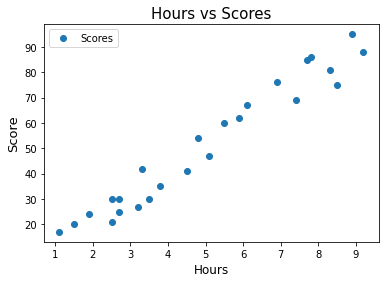

In [ ]:
# Plotting the distribution of scores
plt.figure(figsize=(6,7))
data.plot(x='Hours', y='Scores', style='o') 
plt.title("Hours vs Scores",size=15,color="black")
plt.xlabel("Hours",size=12)
plt.ylabel("Score",size=13)
plt.show() 

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

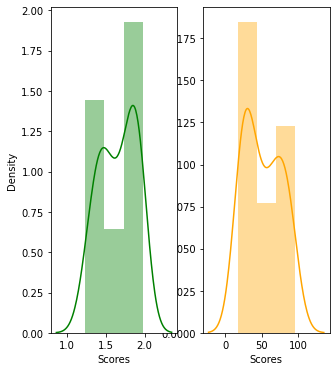

In [ ]:
#analysis for scores using log
f=plt.figure(figsize=(5,6))
ax=f.add_subplot(122)
sns.distplot(data["Scores"],color="orange",ax=ax)
ax=f.add_subplot(121)
sns.distplot(np.log10(data["Scores"]),color="green",ax=ax)
plt.show()

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [23]:
from sklearn.model_selection import train_test_split  

In [22]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0) 
                             

**Training the Algorithm**

*We have split our data into training and testing sets, and now is finally the time to train our algorithm *

In [25]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


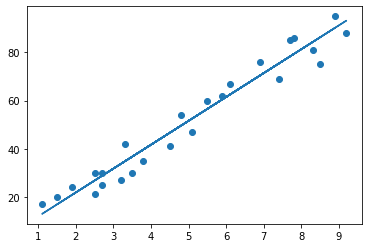

In [26]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [27]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [34]:
# You can also test with your own data
hours = np.array(9.25)
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


**Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [35]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
